In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 1200
plt.rcParams["figure.figsize"] = [10,10]

In [2]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_H2O=18.0153 #in grams
mol_weight_cao=56.077#in grams
mol_weight_mgo=40.3044 #in grams
mol_weight_al2o3=101.9613 #in grams

## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

Iron ore is reducd by hydrogen at a temperature of 800-900 C in an endothermic reaction using 99.5 kJ/mol.<br />
$Fe_{2}O_{3}+ 3H_{2}---> 2Fe + 3H_{2}O$

In [3]:
# to produce 1 mole of iron 2/3 rd mole of hydrogen are required
H2_per_mol=3/2 
# Weight of H2 for producing one mole of Fe in gms
H2_weight=(H2_per_mol)*mol_weight_H2 
# Number of moles in 1 ton of Fe
mol_per_ton_fe=(1000000)/mol_weight_fe
# Weight of hydrogen in kg to reduce 1 ton of Fe2O3
h2_per_ton_steel=(H2_weight*mol_per_ton_fe)/1000 

print("Hydrogen required to produce 1 ton of iron in kg/ton of iron:",h2_per_ton_steel)



Hydrogen required to produce 1 ton of iron in kg/ton of iron: 54.146655922643035


### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)
 Actual amount of hydrogen entering the shaft furnace is higher than the stoichiometric value.The ration between the actual value and the stoichiometric value is defined as lambda_h2 in these calculations. The graph below shows the variation of mass flow rate of hydrogen with lamda_h2.



In [4]:
lambda_h2=1.3

h2_per_ton_actual=(h2_per_ton_steel*lambda_h2) 
print("Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg :",
h2_per_ton_actual)
m3=h2_per_ton_actual
m3

Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg : 70.39065269943595


70.39065269943595

# Calculations are based on the production of 200 kt of hydrogen per annum.

In [5]:
h2_prod_yr=200000000 #in kg per year 

In [6]:
# Plant is operational 95% of the time in an year 
operating_hours=365*24*0.95 

In [7]:
h2_prod_hr=h2_prod_yr/operating_hours
h2_prod_hr

24032.68445085316

In [8]:
#Stoichiometric value for reduction of iron ore
h2_per_ton_steel=54.14 

In [9]:
#Excess hydrogen fed in the dri shaft furnace for complete reduction of iron ore 
lambda_h2=1.47


In [10]:
# Calculating the actual amount of hydrogen required for production of one ton of steel
h2_per_ton_actual=lambda_h2*h2_per_ton_steel

### Calculate the amount of steel produced per hour 

In [11]:
steel_per_hr=h2_prod_hr/h2_per_ton_actual
steel_prod_yr=steel_per_hr*operating_hours


### Carbon production from  methane pyrolysis

In [12]:
carbon_per_hr=(h2_prod_hr*3) 
carbon_per_hr
carbon_per_year=carbon_per_hr*operating_hours
print("Carbon produced per year in kg",carbon_per_year)
print("Carbon produced per year in kg",carbon_per_hr)

Carbon produced per year in kg 600000000.0
Carbon produced per year in kg 72098.05335255948


## Energy analysis

Based on the article : 
Coupled hydrodynamic and kinetic model of liquid
metal bubble reactor for hydrogen production by
noncatalytic thermal decomposition of methane 
Lionel jj catalan and Ebrahim rezaei

![title](reactor_config.jpg)

In [13]:
T_reactor=[1000,1050,1100,1100,1100,1100,1200,1200,1200,1200] #in C
heat_source=['FH','FH','FH','FH','FH','FH','EH','EH','EH','EH']

In [14]:
conversion_meth=[0.65,0.65,0.65,0.70,0.80,0.90,0.65,0.70,0.80,0.90]

In [15]:
met_feed_rate=[2544,2544,2544,2362,2067,1837,2544,2362,2067,1837] #mol/sec

In [16]:
#Multiplied by the molecular weight of methane
met_feed_rate_kg=[x*0.016 for x in met_feed_rate]


In [17]:
met_feed_rate_kg_hr=[x*(3600) for x in met_feed_rate_kg]
hydrogen_per_hr_list=[]
for i in range(len(met_feed_rate)):
    hydrogen_per_hr_list.append((met_feed_rate_kg_hr[i]*conversion_meth[i])/4)
np.asarray(hydrogen_per_hr_list)
hydrogen_per_hr=np.round(hydrogen_per_hr_list,decimals=0).tolist()  


In [18]:
#Reactor diameter
dia_reac=[5.35,4.04,3.50,3.82,4.84,8.18,2.84,3.08,3.77,5.21]

In [19]:
len_reac=[96.2,37.1,14.3,17.6,26.9,43.1,2.40,2.99,4.80,8.66]


In [20]:
ratio=[]
for i in range(len(dia_reac)):
    ratio.append(len_reac[i]/dia_reac[i])

In [21]:
sur_area_reac=[]


vol_reac=[]
for i in range(len(dia_reac)):
    vol_reac.append((3.14*dia_reac[i]*dia_reac[i]*len_reac[i])/4)
    sur_area_reac.append(((2*np.pi*(dia_reac[i]/2)) * len_reac[i]) + ((np.pi*(dia_reac[i]/2)**2)*2))

In [22]:
p_reac_bot=[66.6,52.4,57.8,46.5,31.8,27.3,91.7,70.4,39.5,19.1]
p_reac_top=[17.6,35.4,51.5,38.6,19.4,4.9,90.6,69.1,37.4,15.3]

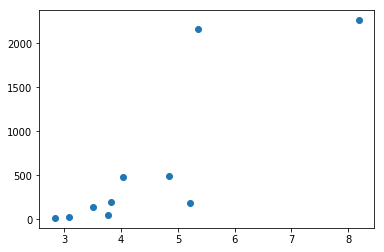

In [23]:
gas_holdup_bot=[0.107,0.205,0.243,0.231,0.187,0.77,0.259,0.255,0.246,0.22]
gas_holdup_top=[0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32]
gas_holdup_avg=[0.199,0.262,0.297,0.292,0.269,0.172,0.306,0.306,0.305,0.294]
plt.scatter(dia_reac,vol_reac,label='bottom')


In [24]:
v_metal=[]
for i in range(len(vol_reac)):
    v_metal.append((vol_reac[i]*(1-gas_holdup_avg[i])))
v_metal

[1731.3497513324999,
 350.80248278880003,
 96.67119962500003,
 142.7388876672,
 361.6013448344,
 1874.4932075112001,
 10.545739737599998,
 15.452606609440002,
 37.220174004,
 130.27698418426002]

In [25]:
vol_reac

[2161.4853325,
 475.34211760000005,
 137.51237500000002,
 201.6085984,
 494.66668239999996,
 2263.8806854,
 15.195590399999999,
 22.266003760000004,
 53.5542072,
 184.52830621000004]

## Liquid tin thermophysical property calculation

#### Reference : https://link.springer.com/content/pdf/10.1134/S0036029518020143.pdf

32856.068 32.856068 278.2761751503346
[230.08239180147373, 242.13083763868892, 254.17928347590413, 254.17928347590413, 254.17928347590413, 254.17928347590413, 278.27617515033455, 278.27617515033455, 278.27617515033455, 278.27617515033455]
10


'plt.figure(figsize=(12,5))\nplt.scatter(dia_reac,tin_cost_million)\nplt.xlabel("Reactor diameter")\nplt.ylabel("Cost of tin in million Euros")'

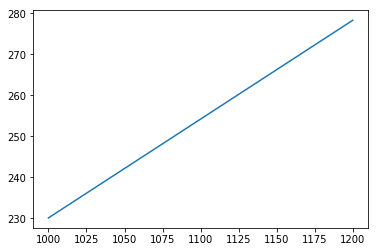

In [26]:
T1=505
#Calculation of delta h in j/mol
tin_mol_weight=118.07
h1=-5855.135+15.961*T1+((18.8702/1000)*T1*T1)-(6.2472334*10**-6*T1*T1*T1)-(123920/T1) 

h1_j_g=h1/tin_mol_weight
T2=800

h2=9496.31+8.2590486*T2+((16.814429/1000)*T2*T2)-(5.24626*10**-6*(1/T2**3))-(2162488/T2)

T3=1200

h3=-1285.372+28.4512*T3

H=h3
H_kj=H/1000 # in kJ/mol
H_kj_g=(H_kj)/tin_mol_weight
H_kj_kg=H_kj_g*1000

print(H, H_kj,H_kj_kg)

#### Heat required for heating tin inside the bubble column reactor from 298 K to T_final

T_final=T_reactor

H_tin=[]
for i in range(len(T_reactor)):
       H_tin.append((-1285.372+28.4512*T_final[i])/tin_mol_weight)
print(H_tin)
print(len(H_tin))
plt.plot(T_final,H_tin)

### Density variation of liquid tin with changing temperature

#### Reference : https://sci-hub.se/https://doi.org/10.1063/1.3467496

c3=6979 #kg/m3
c4=0.652 
t_ref=[505.08,505.08,505.08,505.08,505.08,505.08,505.08,505.08,505.08,505.08]
rho_final=[]
for i in range(len(t_ref)):
    rho_final.append(c3-c4*(T_final[i]-t_ref[i]))


### Calculation of weight of liquid tin 

weight_tin=[]
for i in range(len(vol_reac)):
    weight_tin.append(rho_final[i]*v_metal[i])





"""plt.figure(figsize=(12,5))
plt.scatter(dia_reac,tin_cost_million)
plt.xlabel("Reactor diameter")
plt.ylabel("Cost of tin in million Euros")"""

### Capital cost of the metal
#### Source : http://www.metalary.com/tin-price/

In [27]:
weight_perkg=14918.53/1000 # USD/kg
tin_cost=[]
for i in range(len(weight_tin)):
    tin_cost.append(weight_tin[i]*weight_perkg)

#Cost of tin in million Euros
million=10**6
tin_cost_million=[x / million for x in tin_cost]
print("Cost of tin in USD milliom",tin_cost_million)

Cost of tin in USD milliom [171.92717281839944, 34.6649151778486, 9.505650492044794, 14.03547264387892, 35.55615338159379, 184.31836316744636, 1.0267017559121527, 1.5044196741140508, 3.62364508854828, 12.68337847747413]


#### Cost of the bubble column reactor

Considering that the reactor is made of 45 mm thick carbon steel. The cost of stainless steel is assumed to be USD 600 /ton. The reactor is lined with refractory (magnesium oxide) layer of 600 mm and the cost of refractory bricks is 400 USD/ton.

In [28]:
vol_steel_reactor=[]
vol_refractory=[]
steel_density=7700 #kg/m3
refractory_density=2970 #kg/m3
weight_steel_reactor=[]
weight_refractory=[]
steel_cost=600 #USD/ton
refractory_cost=400 #USD/ton
reactor_cost=[]
tank_manufacturing=100 #USD/ton
refractory_labour=50 #USD/ton
for i in range(len(len_reac)):
    vol_steel_reactor.append(np.pi*((dia_reac[i]/2+0.045)**2-(dia_reac[i]/2)**2)*len_reac[i])
    vol_refractory.append(np.pi*((dia_reac[i]/2+0.4)**2-(dia_reac[i]/2)**2)*len_reac[i])
    weight_steel_reactor.append((vol_steel_reactor[i]*steel_density)/1000)
    weight_refractory.append((vol_refractory[i]*refractory_density)/1000)

In [29]:
for i in range(len(conversion_meth)):
    reactor_cost.append(((weight_steel_reactor[i]*steel_cost)+(weight_refractory[i]*refractory_cost)+(weight_steel_reactor[i]*100)+(weight_refractory[i]*50))/10**6+(tin_cost_million[i]))

## Energy consumption and emissions from different reactor configurations 

### Energy calculations
#### Enthalpy of carbon 
https://webbook.nist.gov/cgi/cbook.cgi?ID=C7440440&Type=JANAFG&Plot=on

It is assumed that 75% of the energy going out from th carbon stream is recovered by passing the incoming natural gas stream through the hot carbon bed. The outlet temperature should not be more than 800 C, otherwise natural gas pyrolysis will start before entering the bubble column reactor.

In [30]:
### Carbon production from  methane pyrolysis
carbon_per_hr=[]
carbon_per_tls=[]
for i in range(len(hydrogen_per_hr)):
    carbon_per_hr.append(hydrogen_per_hr[i]*3) 
    carbon_per_tls.append(carbon_per_hr[i]/steel_per_hr)


In [31]:

t=[]
for i in range(len(T_reactor)):
    t.append((T_reactor[i]+273)/1000)

# It is assumed that the carbon deposited at the top 
#of the molten metal is at the same temperature as the reactor 
H_carbon_si_perkg=[]
H_carbon_total=[]
H_carbon_tls=[]

In [32]:
H_carbon=[]
A=21.17510
B=-0.812428
C=0.448537
D=-0.043256
E=-0.013103
F=710.3470
G=183.8734
H=716.6690

In [33]:
for i in range(len(T_reactor)):
    H_carbon.append((A*(t[i]) + (B*t[i]**2)/2+ (C*t[i]**3)/3) + ((D*t[i]**4)/4)-(E/t[i])+ F-H)
    H_carbon_si_perkg.append(H_carbon[i]/0.012)
    H_carbon_total.append((H_carbon_si_perkg[i]*carbon_per_hr[i])/3600)
    H_carbon_tls.append(H_carbon_total[i]/steel_per_hr)

Text(0, 0.5, 'Enthalpy of the carbon in KWh/tls')

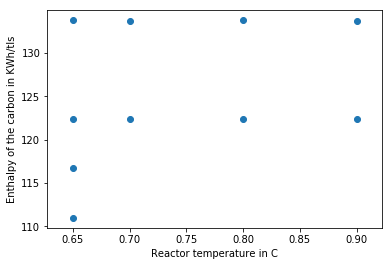

In [34]:
plt.scatter(conversion_meth,H_carbon_tls)
plt.xlabel("Reactor temperature in C")
plt.ylabel("Enthalpy of the carbon in KWh/tls")

### Enthalpy of hydrogen exiting the reactor 
H° − H°298.15= A*t + B*t2/2 + C*t3/3 + D*t4/4 − E/t + F − H
source : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1333740&Mask=1&Type=JANAFG&Plot=on

In [35]:
H_hydrogen=[]
H_hydrogen_total=[]
H_hydrogen_si_perkg=[]
H_hydrogen_tls=[]
A_h=18.563083
B_h=12.257357
C_h=-2.859786
D_h=0.268238
E_h=1.977990
F_h=-1.147438
G_h=156.288133
H_h=0


In [36]:
for i in range(len(T_reactor)):
    H_hydrogen.append((A_h*(t[i]) + (B_h*t[i]**2)/2+ (C_h*t[i]**3)/3) + ((D_h*t[i]**4)/4)-(E_h/t[i])+ F_h-H_h)
    H_hydrogen_si_perkg.append(H_hydrogen[i]/0.002)
    H_hydrogen_total.append((H_hydrogen_si_perkg[i]*hydrogen_per_hr[i])/3600)
    H_hydrogen_tls.append(H_hydrogen_total[i]/steel_per_hr)

Text(0, 0.5, 'Enthalpy of the hydrogen in KWh/tls')

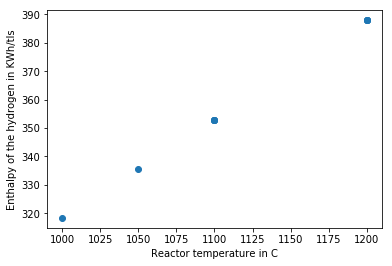

In [37]:
plt.scatter(T_reactor,H_hydrogen_tls)
plt.xlabel("Reactor temperature in C")
plt.ylabel("Enthalpy of the hydrogen in KWh/tls")

### Energy required to heat methane 

Source : https://webbook.nist.gov/cgi/cbook.cgi?ID=C74828&Units=SI&Mask=1&Type=JANAFG&Plot=on


In [38]:
H_methane=[]
H_methane_total=[]
H_methane_si_perkg=[]
H_methane_tls=[]
A_m=85.81217
B_m=11.26467
C_m=-2.114146
D_m=0.138190
E_m=-26.42221
F_m=-153.5327
G_m=224.4143
H_m=-74.87310

In [39]:
for i in range(len(T_reactor)):
    H_methane.append((A_m*(t[i]) + (B_m*t[i]**2)/2+ (C_m*t[i]**3)/3) + ((D_m*t[i]**4)/4)-(E_m/t[i])+ F_m-H_m)
    H_methane_si_perkg.append(H_methane[i]/0.016)
    H_methane_total.append((H_methane_si_perkg[i]*met_feed_rate_kg_hr[i])/3600)
    H_methane_tls.append(H_methane_total[i]/steel_per_hr)

Text(0, 0.5, 'Enthalpy of methane in KWh/tls')

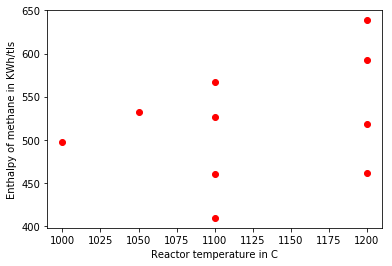

In [40]:
plt.scatter(T_reactor,H_methane_tls,color='red')
plt.xlabel("Reactor temperature in C")
plt.ylabel("Enthalpy of methane in KWh/tls")

### Reaction enthalpy calculation
CH<sub>4</sub>---->>  C+2H<sub>2</sub>

In [41]:
H_reac=74.5 #kj/mole
H_reac_kg=H_reac/0.016
H_reac_total=[]
H_reac_tls=[]


In [42]:
for i in range(len(met_feed_rate_kg_hr)):
    H_reac_total.append((met_feed_rate_kg_hr[i]*H_reac_kg*conversion_meth[i])/3600)
    H_reac_tls.append(H_reac_total[i]/steel_per_hr)

### Total energy requirement per hour 

In [43]:
H_total_per_hr=[]
H_total_per_hr_MWh=[]
H_per_ton_steel=[]
for i in range(len(T_reactor)):
    # 75% of the outgoing energy from the carbon stream is recovered, 
    # so only 25 % of the outgoing energy
    # needs to be supplied.
    H_total_per_hr.append(H_reac_total[i]+H_methane_total[i]+H_hydrogen_total[i]+(H_carbon_total[i])*0.25)
    H_total_per_hr_MWh.append(H_total_per_hr[i]/1000)
    H_per_ton_steel.append(H_total_per_hr_MWh[i]/steel_per_hr)#MWh

Text(0.5, 0, 'Conversion factor')

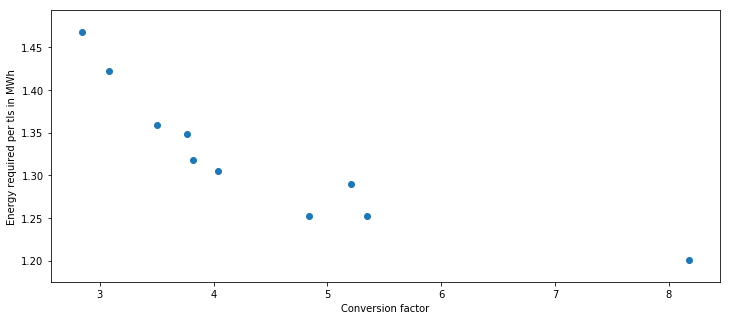

In [44]:
plt.figure(figsize=(12,5))
plt.scatter(dia_reac,H_per_ton_steel)
plt.ylabel('Energy required per tls in MWh')
plt.xlabel('Conversion factor')

## Natural gas required for providing  energy to the reactor 

Some of the natural gas remains unused in the reactor and can be separated and used for providing the heat for the reaction. 

In [45]:
ng_cal=55000 # Kj/kg
ng_req=[]
extra_ng_req_tls=[]
total_ng_req_tls=[]
gas_heater_cost=[]
for i in range(len(T_reactor)):
    if(heat_source[i]=='FH'):
        ng_req.append((H_total_per_hr[i]*3600)/ng_cal)
        extra_ng_req_tls.append(ng_req[i]/steel_per_hr)
        total_ng_req_tls.append(extra_ng_req_tls[i]+(met_feed_rate_kg_hr[i]/steel_per_hr))
        gas_heater_cost.append(1)
    else :
        extra_ng_req_tls.append(0)
        total_ng_req_tls.append(extra_ng_req_tls[i]+(met_feed_rate_kg_hr[i]/steel_per_hr))
        gas_heater_cost.append(0)
    
    

In [46]:
total_ng_req_tls

[567.2062266405063,
 570.6720061369626,
 574.1860082423966,
 536.808014267656,
 476.23955742655284,
 429.0026478169903,
 485.2582105577472,
 450.5424109030657,
 394.27229607816963,
 350.4006811299456]

### Electrical energy required for heating the reactor 

In [47]:
eta_el=0.9
el_heat_reac=[]
el_heater_cost=[]
for i in range(len(H_per_ton_steel)):
    if(heat_source[i]=='EH'):
        el_heat_reac.append(H_per_ton_steel[i]/eta_el)
        # Cost of electric heater has been assumed to be 50 Million
        el_heater_cost.append(50)
    else:
        el_heat_reac.append(0)
        el_heater_cost.append(0)

## Emission calculations 

In [48]:
## CO2 emission
##The emissions are generated by burning methane in the
##gas fired heater and by using electricity from the grid. 

methane_ems=2.75 # amount of CO2 released by burning 1 kg of CH4
reac_ems_meth=[]
reac_ems_el=[]
grid_emission_factor=0.446 #ton/MWh
"""Institute for Global Environmental Strategies (2020). List of Grid Emission Factors, version 10.8. Available at: https://pub.iges.or.jp/pub/iges-list-grid-emission-factors
All copyrights are reserved. The source must be clearly stated when this database is reproduced or transmitted in any form or by any means.

Value for Germany taken from : https://www.carbonfootprint.com/docs/2018_8_electricity_factors_august_2018_-_online_sources.pdf"""
for i in range(len(el_heat_reac)):
    reac_ems_meth.append((extra_ng_req_tls[i]*methane_ems)/1000)
    reac_ems_el.append(el_heat_reac[i]*grid_emission_factor)








In [49]:
#df=df_reactor_con.transpose()


In [50]:
#print(df.to_latex(index=True)) 

In [51]:
"""""## Heat required to raise the temperature of tin to 1200 C/1473 K
This energy is not cyclic requirement, as the molten steel does not change its state. 

Heat_tin=[]
for i in range(len(weight_tin)):
    Heat_tin.append((H_tin[i]*weight_tin[i]*2)/3600000)
#cosnidering 10 heating cycles of the metal

plt.scatter(dia_reac,Heat_tin)#MWh"""

'""## Heat required to raise the temperature of tin to 1200 C/1473 K\nThis energy is not cyclic requirement, as the molten steel does not change its state. \n\nHeat_tin=[]\nfor i in range(len(weight_tin)):\n    Heat_tin.append((H_tin[i]*weight_tin[i]*2)/3600000)\n#cosnidering 10 heating cycles of the metal\n\nplt.scatter(dia_reac,Heat_tin)#MWh'

## HDRI-EAF calculations 

Mass and energy balance model of the HDRI-EAF system coupled with an electrolyser has been developed in this work. All the calculations are based on steady state conditions. Enthalpy values have been calculated from NIST data. All the relevant calculations are presented in the Github repository https://github.com/abhinavbhaskar/directreducediron
Some of the important assumptions made for the model are listed below :

  
1. All calculations are done for the production of 1 ton of liquid steel from the system.
2. 5% impurities are present in the raw materials. The assumption is consistent with the plant data available in the literature.Primary components of the impurities are silica and alumina.
3. The iron ore pellets are heated from ambient temperature to 800 C,through an electrical heater of efficiency, $\eta_{thermal}=0.85$.
4. Output from the shaft furnace would be metallic Fe and FeO. Remaining FeO will be reduced to pure iron in the electric arc furnace. Although, in practice some amount of FeO does not get reduced and becomes a part of the EAF slag.
5. The flow rate of hydrogen is considered to be higher than the stoichiometric requirements.
6. Apparent activation energy of 35 kJ/mol has been considered in the model. 
7. Hydrogen produced from electrolysers are heated in an electrical heater with an efficiency of $\eta_{thermal}=0.6$.

8. DRI stream exiting the shaft furnace is considered to be at a temperature of  800C.
9. The exhaust gas stream is assumed to be composed of hydrogen and water.The waste stream enthalpy varies with exhaust gas temperature and $\lambda_{h{2}}$.
10. Energy required to separate hydrogen and water from the waste stream is not considered in the present calculations.
11. 100\% DRI is fed into the furnace without any scrap. The quality of scrap has a significant effect on the energy consumption in a DRI. 
12. Hot DRI is fed into the DRI at 700 \textdegree C as it saves considerable amount of electrical energy in the EAF.
13. Natural gas is not used for heating the material as its the general practice to use natural gas with scrap for initial heating.
14. As DRI is reduced only with Hydrogen, it is assumed that it does not contain any ferric carbide. Carbon required for reduction of remaining FeO in the EAF is supplied externally as coal or coke. 
15. Temperature of the DRI being fed into the EAF is not taken into account into empirical energy models (Pfeifer2003). Thermodynamic modelling of the EAF has been done to get the specific energy consumption of the EAF with 100% DRI. 
16. Carbon is added into the EAF to reduce the remaining FeO in the mix and also to generate CO for froth formation,which is essential for the operation of the EAF and to extend the life of the graphite electrodes and the refractory.
17. CaO and MgO are added in the EAF as slag formers to maintain the basicity of the EAF.The weight of CaO and MgO used are according to data published in the literature (Dilmac2015).
18. Efficiency parameters used in the EAF model for electrical and chemical energy are according to the reference 


# Mass and energy balance for a direct reduction shaft furnace 

Iron ore pellets containing upto 5% impurities eneter the direct shaft furnace after being heated to the reaction temperature of $800 C $ by electrical heaters.

${M_{Fe_{2}O_{3}}=\frac{1}{({Fe_{2}O_{3}}_{pure}*FeO_{ratio}*alpha)}}$ <br />
Where, <br />
$M_{Fe_{2}O_{3}}$= Mass flow rate of iron ore for production of 1 ton of liquid steel in kg/tls<br />
${Fe_{2}O_{3}}_{pure}$=Percentage of pure iron ore in the iron ore stream (assumed to be 0.95)<br />
$FeO_{ratio}$=Ratio of molecular weight of iron contained in iron oxide (0.7) <br />


Mass flow rate of iron ore into the shaft : m1 <br />
Mass flow rate of Silica into the shaft : m1_sio2   <br /> 
Mass flow rate of Alumina into the shaft : m1_al2o3: <br />
Mass flow rate of Wustite from the DRI shaft furnace to the EAF :m4_feo <br />

In [52]:
# Metallization rates considered for the DRI reduction shaft furnace
alpha=0.94 
# Percentage of hematite in the raw material. 
fe2O3_pure=0.95 
# percentage of iron in one mole of iron ore 
Fe_O_ratio=(112/160)
# Tons of steel produced in the DRI-EAF system
m6=1
# Weight of total iron ore fed to the DRI-EAF system
m1=m6/(fe2O3_pure*Fe_O_ratio*alpha)
# Depends on the slag content , metallization rate 
m4_feo=(m1*fe2O3_pure*(1-alpha)*Fe_O_ratio) 
print("FeO percentage :",m4_feo)
# Percentage of silica in the ore pellets
SIO2_per=3 
#Percentage of alumina in the ore pellets
Al2O3_per=2 
m1_sio2=(m1*SIO2_per)/100 # SiO2 weight in ton
m1_al2o3=(m1*Al2O3_per)/100 # weight in ton
print("Mass of iron ore fed to the shaft furnace in ton/tls:",m1)
print("Mass of wustite  DRI_EAF processin ton/tls:",m4_feo)
print("Mass of SiO2 in ton/tls",m1_sio2)
print("Mass of Al2O3",m1_al2o3)

FeO percentage : 0.06382978723404262
Mass of iron ore fed to the shaft furnace in ton/tls: 1.5997440409534478
Mass of wustite  DRI_EAF processin ton/tls: 0.06382978723404262
Mass of SiO2 in ton/tls 0.04799232122860343
Mass of Al2O3 0.031994880819068955


In [53]:
T_dri_shaft=1073 # 800C 
def H2_enthalpy_1(T):
    t=T/1000
    mol_wt_h2=0.002 #kg/mol
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=(A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H)/mol_wt_h2
    return H_t
H2_en_per_kg=[]
H2_en_per_tls=[]
for i in range(len(T_reactor)):
    t_r=(T_reactor[i]+273.15)
    #print(t_r)#Bubble column reactor temperature
    H2_en_per_kg.append(H2_enthalpy_1(t_r)-H2_enthalpy_1(T_dri_shaft))
    H2_en_per_tls.append((H2_en_per_kg[i]*h2_per_ton_actual)/3600)
#Amount of heat available in hydrogen stream for heating the pellets
#H_pellet_heating=(H_hydrogen_si_perkg[i]-(H2_en_per_mol/0.002))#kj/kg
#H_pellet_heating_total=((H_pellet_heating*h2_prod_hr)/3600)
#H_pellet_heating_total

H2_en_per_tls

[68.32405097302126,
 85.6902140571779,
 103.17965893140834,
 103.17965893140834,
 103.17965893140834,
 103.17965893140834,
 138.52811210074373,
 138.52811210074373,
 138.52811210074373,
 138.52811210074373]

### Heat required to heat the pellets 
The raw materials (ore and impurities) are both heated from ambient temperature to 900 C, which is the reaction temperature.The heat is provided through electrical heaters at an electrical efficiency of 0.85. The input temperature of the pellets is considered to be 298 K and the exit temperature to be 1073 K.

In [54]:
T1=298 # K Inlet temperature

# Enthalpy calculations for the different raw materials fed to the shaft furnace.
m2=m1
# T1 and T2 should be in the range of 298-950 K 
def fe2o3_enthalpy_1(T):
    t=T/1000
    A=93.43834
    B=108.3577
    C=-50.86447
    D=25.58683
    E=-1.611330
    F=-863.2094   
    G=161.0719
    H=-825.5032 
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
# T1 and T2 should be in the range of 1050-2500 K 
def fe2o3_enthalpy_2(T):
    t=T/1000
    A=150.6240
    B=0
    C=0
    D=0
    E=0
    F=-875.6066
    G=252.8814
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_3(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=110.9362
    B=32.04714
    C=-9.192333
    D=0.901506
    E=5.433677
    F=-843.1471
    G=228.3548
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
"""Enthalpy data for sio2/quartz : https://webbook.nist.gov/cgi/cbook.cgi?ID=C14808607&Mask=2"""
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t



In [55]:
 # K outlet temperature
def pellet_heating(T2):
    if T2 in range(298,951):
        h2=fe2o3_enthalpy_1(T2)-fe2o3_enthalpy_1(T1)
    elif T2 in range(951,1051):
        h2=fe2o3_enthalpy_2(T2)-fe2o3_enthalpy_1(T1)
    elif T2 in range(1051,2501):
        h2=fe2o3_enthalpy_3(T2)-fe2o3_enthalpy_1(T1)
    mol_per_ton_Fe2o3=1000000/mol_weight_fe2o3 # 1 ton= 10^6 grams 
    h2_ton=h2*mol_per_ton_Fe2o3
    H2=((h2_ton))*m2 # Energy consumption in KJ
    #print("Enthalpy of Iron ore in KJ/kg :",h2_ton/1000)
    #print(" Enthalpy of iron ore in kJ :",H2) 
    h1_sio2=sio2_enthalpy(T1) 
    h2_sio2=sio2_enthalpy(T2) 
    En_per_mol_sio2=h2_sio2-h1_sio2
    #print("Energy per mol",En_per_mol)
    # 1 ton= 10^6 grams
    mol_per_ton_sio2=1000000/mol_weight_Sio2 
    #Energy per ton of SiO2 multiplied by the weight of sio2 
    En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*m1_sio2 
    H2_sio2=En_sio2 
    #print("Enthalpy of sio2 in KJ :",H2_sio2)
    h1_al2o3=Al2O3_enthalpy(T1)
    h2_al2o3=Al2O3_enthalpy(T2) 
    En_per_mol_al2o3=h2_al2o3-h1_al2o3
    #print("Energy per mole al2o3",En_per_mol_al2o3)
    mol_per_ton_al2o3=1000000/mol_weight_al2o3 # 1 ton= 10^6 grams 
    # Energy per ton of Al2O3 multiplied by the weight of Al2O3
    En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*m1_al2o3 
    H2_al2o3=En_al2o3
    #print("Energy to heat aluminium oxide:",H2_al2o3) #In Kj/ton
    pellet_heating=(H2+H2_sio2+H2_al2o3)# In KJ
    pellet_heating_KWh=pellet_heating/3600
    return(pellet_heating_KWh)


### Calculate the pellet temperature from pre-heating with hydrogen stream

In [56]:
T_pellet=[] # Temperature of pellets after pre-heating
for i in range(len(T_reactor)):
    for j in range(298,1073):
        T2=j
        p=pellet_heating(T2)
        q=H2_en_per_tls[i]
        if(p>=q):
            T_pellet.append(T2)
            break
T_pellet


[492, 536, 579, 579, 579, 579, 663, 663, 663, 663]

### Additional heat required in the reactor for pellet heating

![title](DRI_energy_balance.jpg)

## Input energy streams

In [57]:
T5=523 # Temperature of the hydrogen and water stream exiting the shaft furnace in K
H2_dri_kg=[]
H2_dri_tls=[]
for i in range(len(T_reactor)):
    t_s=(T_pellet[i])
    #print(t_r)#Bubble column reactor temperature
    H2_dri_kg.append((H2_enthalpy_1(T_dri_shaft)-H2_enthalpy_1(t_s))/3600)
    H2_dri_tls.append((H2_en_per_kg[i]*h2_per_ton_actual)/3600)

## Energy contained in the pellets + impurities 

In [58]:
def pellet_input_energy(T):#per tls
    if T2 in range(298,951):
        h2_en=fe2o3_enthalpy_1(T)
    elif T2 in range(951,1051):
        h2_en=fe2o3_enthalpy_2(T)
    elif T2 in range(1051,2501):
        h2_en=fe2o3_enthalpy_3(T2)
    mol_per_ton_Fe2o3=1000000/mol_weight_fe2o3 # 1 ton= 10^6 grams 
    h2_ton=h2_en*mol_per_ton_Fe2o3
    H2_en=((h2_ton))*m2 # Energy consumption in KJ
    #print("Enthalpy of Iron ore in KJ/kg :",h2_ton/1000)
    #print(" Enthalpy of iron ore in kJ :",H2) 
    h1_sio2=sio2_enthalpy(T) 
    
    En_per_mol_sio2=h1_sio2
    #print("Energy per mol",En_per_mol)
    # 1 ton= 10^6 grams
    mol_per_ton_sio2=1000000/mol_weight_Sio2 
    #Energy per ton of SiO2 multiplied by the weight of sio2 
    En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*m1_sio2 
    H2_sio2_en=En_sio2 
    #print("Enthalpy of sio2 in KJ :",H2_sio2)
    h1_al2o3=Al2O3_enthalpy(T1)
    #h2_al2o3=Al2O3_enthalpy(T2) 
    En_per_mol_al2o3=h1_al2o3
    #print("Energy per mole al2o3",En_per_mol_al2o3)
    mol_per_ton_al2o3=1000000/mol_weight_al2o3 # 1 ton= 10^6 grams 
    # Energy per ton of Al2O3 multiplied by the weight of Al2O3
    En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*m1_al2o3 
    H2_al2o3_en=En_al2o3
    #print("Energy to heat aluminium oxide:",H2_al2o3) #In Kj/ton
    pellet_energy=(H2_en+H2_sio2_en+H2_al2o3_en)# In KJ
    pellet_energy_KWh=pellet_energy/3600
    return(pellet_energy_KWh)
pellet_en_KWh=[]# per tls
for i in range(len(T_pellet)):
    T=T_pellet[i]
    pellet_en_KWh.append(pellet_input_energy(T))#tls


In [59]:
T_pellet

[492, 536, 579, 579, 579, 579, 663, 663, 663, 663]

## Calulation of energy streams exiting the shaft furnace

### Mass flow rate of waste gases from the shaft furnace 

It is assumed that the waste gas stream is a mixture of unreacted hydrogen and water/steam produced from the reduction reaction. Amount of water produced would depend on the metallization rate. For ease of calculations, it is assumed that metallization is complete. Amount of unused hydrogen in the waste stream depends on the amount of hydrogen entering the shaft furnace or lambda_h2. Hydrogen is assumed to enter the shaft furnace at 800 C.


In [60]:
# Mass flow rate of water in the waste stream per ton of steel production

water_tls=((3*mol_weight_H2O)/(2*mol_weight_fe))*1000
print("Amount of water in the waste stream per ton of steel production in kg/tls",water_tls)
## Calculation of the hydrogen in the waste stream 
m5_h2=(m3*(lambda_h2-1)) #Kg/tls
m5_h2o=(water_tls)
# The value varies with input flow rate of hydrogen inside the shaft furnace
print("Amount of hydrogen in the waste stream per ton of steel production in kg/tls",m5_h2,m5_h2o)


Amount of water in the waste stream per ton of steel production in kg/tls 483.89202256244965
Amount of hydrogen in the waste stream per ton of steel production in kg/tls 33.083606768734896 483.89202256244965


### Energy contained in the DRI exhaust

Temperature of the waste gas stream could vary according to the input temperature and flow rate of the hydrogen stream.Plant data from Syngas based DRI shaft furnace show that the temperature could vary from 275 C to 400 C.Higher temperatures are witnessed when the content of CO in the Syngas is higher.The reduction reaction between heamtite and CO is exothermic.On the other hand , hydrogen reduction of hematite is endothermic. We have assumed a temperature of 250 C for the calculation of energy content in the waste gas stream.

### Energy contained in water stream

In [61]:
# Reference :https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1

def H2O_enthalpy(T):
    t=T/1000
    A=30.09200
    B=6.832514
    C=6.793435
    D=-2.534480
    E=0.082139
    F=-250.8810
    G=223.3967
    H=-241.8264
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2O_en_per_mol=H2O_enthalpy(T5)
mol_per_kg_H2O=1000/mol_weight_H2O # Number of moles in one kg
h5_h2o=(mol_per_kg_H2O)*(H2O_en_per_mol)

#print("Enthalpy per Kg of Water in kJ/kg at T5:",h5_h2o)
# Multiplying the specific enthalpy with mass flow rate 
H5_h2o=m5_h2o*h5_h2o

#print("Enthalpy in water stream per Kg of steel in kJ:",H5_h2o)

### Energy in the hydrogen from the DRI exhaust stream

In [62]:
def H2_enthalpy_2(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_en_per_mol=H2_enthalpy_2(T5)     
#mol_per_kg_H2=(1000/mol_weight_H2) # Number of moles in one kg 
h5_h2=((1000/mol_weight_H2)*H2_en_per_mol)
H5_h2=(h5_h2*(m5_h2))



### Total energy content of the DRI waste stream

In [63]:
H5=((H5_h2+H5_h2o))
print("Energy contained in the waste stream in kJ",H5)

H5_KWh=(H5/3600)
print("Energy contained in the waste stream in KWh",H5_KWh )

Energy contained in the waste stream in kJ 315413.31130831526
Energy contained in the waste stream in KWh 87.61480869675424


## Reaction enthalpy calculation
The reaction enthalpy has been taken as 99.5 kJ/mol based on stoichiometric calculations.Activation enethalpy has not been considered in these calculations.

In [64]:
h_activation=35 # kJ/mol activation enthalpy
h_endothermic=99.5 # reaction enthalpy kJ/mol
#Adding the activation enthalpy to the reaction enthalpy
# value in kJ/mol
h_reaction=h_activation+h_endothermic
# Amount of heat to be supplied in kJ for production of 1 ton of molten steel
h_reac=((h_reaction*m1*fe2O3_pure*alpha*1000000)/mol_weight_fe2o3)/3600
#print("Reaction enthalpy in kJ/ton of liquid steel:",h_reac) 
#print("Reaction enthalpy in KWh/ton of liquid steel:",h_reac/3600) 

## Energy contained in the solid stream exiting the DRI
It is assumed that the solid stream is a mixture of iron, iron oxide and impurities such as silica and alumina. The solid stream exits the reactor at a temperature of 700 C.

In [65]:
# The constants are used for a temperature range of 298-1650 K 
# Exit temperature of the FeO stream contained in the solid stream exiting the reactor

T4=973 

def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
h4_feo_mol=(feo_enthalpy(T4)) 
mol_per_ton_feo=1000000/mol_weight_feo# 1 ton= 10^6 grams

h4_feo_ton=(h4_feo_mol*mol_per_ton_feo) 

H4_feo=(h4_feo_ton*m4_feo)
def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

h4_fe_mol=(fe_enthalpy(T4))# Enthalpy of direct reduced iron at the output of the reactor
mol_per_ton_fe=1000000/mol_weight_fe # 1 ton= 10^6 grams
m4_fe=m1*fe2O3_pure*alpha*Fe_O_ratio
m4=m4_fe+m4_feo
H4_fe=(h4_fe_mol*mol_per_ton_fe*m4_fe)
H4=((H4_fe+H4_feo)/3600)


#print("Total energy in the outgoing metallic stream in KWh",H4,m4)

        #print("Temperature",T_dri_exit[j])
        #print("alpha",alpha[i])
#print("Energy per mole feo :",En_per_mol_feo)
#print("Energy per ton feo :",En_per_ton_feo)
#print("Energy contained in the feo stream exiting the reactor",En_feo) #In Kj/tls
H4

107.49889585989698

## Shaft furnace energy balance

In [66]:
Q_shaft_tls=[]
for i in range(len(T_reactor)):
    Q_shaft_tls.append((H4+h_reac+H5_KWh)-(H2_dri_tls[i]+pellet_en_KWh[i]))

In [67]:
print("Extra energy required in shaft furnace per tls in KWh",Q_shaft_tls)

Extra energy required in shaft furnace per tls in KWh [394.41498779881937, 360.1311728302422, 325.5994834004007, 325.5994834004007, 325.5994834004007, 325.5994834004007, 255.60054331407116, 255.60054331407116, 255.60054331407116, 255.60054331407116]


## Amount of electricity required for supplying the energy to the shaft furnace

In [68]:
dri_elec=[]
eta_el_dri=0.9
for i in range(len(Q_shaft_tls)):
    dri_elec.append(Q_shaft_tls[i]/eta_el_dri)

## EAF
Electric energy is required to melt the incoming iron stream or DRI from the shaft furnace. Carbon is used to reduce the remaining FeO in the iron stream. It is an exothermic reaction and produces heat. It is assumed that the incoming DRI is at a temperature of 700 C. This reduces the electricity required to melt the DRI. Apart from the heat supplied to the molten metal, the impurities get heated up and consume significant amount of electricity. The different equations and the modelling concept for the EAF is explained through the equations below :

The modelling work is baseed on the  https://www.sciencedirect.com/science/article/pii/S036054421100524X. <br/>
**_EAF energy balance  - Equation 1_**<br/>


In [69]:
## input and tap temperatures
T4=973# # Temperature input to the EAF 
T6=1923 # Tap temperature of the molten steel 1650 C

### Amount of carbon added  kg/tls

In [70]:

m10=10
m11=50
m11_cao=0.75*m11
m11_mgo=0.25*m11
# Weight of carbon in Kg added per ton for reduction of remaining FeO and
#production of carbon monoxide in the EAF for froth making which is essential for the smooth functioning of then EAF
"""print("Weight of metallic iron",m4_fe) #in ton
print("Weight of iron oxide",m4_feo) # in ton
print("Weight of Al2O3",m1_al2o3)# in ton
print("Weight of SiO2",m1_sio2)# in ton
print("Weight of carbon/tls",m10)
print("Weight of CaO /tls",m11_cao)# in kg
print("Weight of MgO /tls",m11_mgo)# in kg"""

'print("Weight of metallic iron",m4_fe) #in ton\nprint("Weight of iron oxide",m4_feo) # in ton\nprint("Weight of Al2O3",m1_al2o3)# in ton\nprint("Weight of SiO2",m1_sio2)# in ton\nprint("Weight of carbon/tls",m10)\nprint("Weight of CaO /tls",m11_cao)# in kg\nprint("Weight of MgO /tls",m11_mgo)# in kg'

## Exothermic reactions in the EAF

If trace amounts of Si, Al, P, Mn are present in the ore, they get oxidized inside the electric arc furnace, producing heat and help in advancing the reaction. In this model we have considered the percentage of these elements to be negligible. However, we have considered only sio2 and al2o3 and no free metals in our analysis. In practice, these metals are added to the EAF for making alloyed steel with specific properties. We have however, included the codes so that these can be analyzed in the future.Mass percentages have been assumed randomly at this stage. Enthalpy values have been taken as KWh/kg of the primary reactant. 

In [71]:
reactions_EAF={
  'Reactants':["Si","Mn","Cr","Fe","C","Al","MO","S","P"],
  'Atomic weight':[28.085,54.93,51.996,55.847,12,26.9815,95.94,32.06,30.9738],
  'Products': ["SiO2","MnO","Cr2O3","FeO","CO","Al2O3","MOO2","SO2","P2O5"],
  'Enthalpy':[ 8.94,1.93,3.05,1.32,2.55,5.29,1.70,2.75,5.54],
'Percentage':[(0.5),0.1,0.3,0.1,0.6,0.3,0.3,0.1,0.4],
    'Weight':[((0.5)/100*m1),((0.1)/100*m1),((0.3)/100*m1),((0.1)/100*m1),((0.6)/100*m1),((0.3)/100*m1),((0.3)/100*m1),((0.1)/100*m1),((0.4)/100*m1)]
}
df=pd.DataFrame.from_dict(reactions_EAF)
df['Energy']= df['Weight']*df['Enthalpy']
df
df['Energy'].sum()


0.18921772516397378

#### Carbon dissolution in liquid metal is an endothermic reaction 
Solution enthalpy for carbon =0.62 kWh/kgc

In [72]:
## Endothermic reactions
H_carbon=0.62*m10
#print("carbon_sol_enthalpy",H_carbon)

In [73]:

#FeO+C---Fe + CO   Exothermic reaction
reduction_enthalpy=3.59 #kWh/kg of carbon
#lets conider that 70% of the FeO is converted 
#into iron and rest remains in the slag
m4_feo_reduced=(m4_feo*0.7)*1000
feo_weight=71.845 #g/mol
c_weight=12 #g/mol
c_required=(c_weight/feo_weight)*m4_feo_reduced
H_feo_red=c_required*reduction_enthalpy
#print("carbon required",c_required)
#print("Iron oxide reduction enthalpy",H_feo_red)
m4_feo_reduced

44.680851063829834

#### Oxidation reaction of carbon with oxygen

In [74]:

c_remaining=m10-c_required
# Oxidation of carbon to carbon monoxide consider that remaining carbon is converted to CO
# reaction C+0.5 O2---- CO + 9.10 kWh/kg of carbon
H_co=c_remaining*9.10 

In [75]:
# certain portion of the CO escapes from the furnace and is also converted into CO2
print("CO_enthalpy",H_co) 
H_che_ent=H_feo_red+H_co-H_carbon
print("Chemical enthalpy",H_che_ent)

CO_enthalpy 23.087842770266295
Chemical enthalpy 43.67956194111728


## Energy required to melt Fe in the EAF

In [76]:
# Reference : NIST https://webbook.nist.gov/cgi/cbook.cgi?ID=C7439896&Mask=2&Type=JANAFS&Table=on
Hfe_f=247000 # Melting enthalpy of steel per ton in Kj/ton 
#https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
Hfe_T4=fe_enthalpy(T4) # Enthalpy of DRI at the input 
Hfe_T6=fe_enthalpy(T6) # Enthalpy of molten steel at the output
h6=Hfe_T6-Hfe_T4
#print(En_per_mol)
mol_per_ton=1000000/mol_weight_fe # 1 ton= 10^6 grams 
h6_ton=h6*mol_per_ton
print(h6_ton) #In Kj/ton
H6=((h6_ton+Hfe_f)/3600)*m4_fe# Specific energy consumption KWh)n_per_hr,2)
print(H6) 
""" Energy contained in the slag"""
T7=T6

mol_weight_Sio2=60.0843 #in grams
 # Enthalpy of DRI at the input 
h7_sio2=sio2_enthalpy(T7)-sio2_enthalpy(T4)
#print("Energy per mol",h7_sio2)
mol_per_ton=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
h7_sio2_ton=h7_sio2*mol_per_ton
#En_total=En_per_ton # H_f needs to be added only when there is a conversion from solid to liquid 
print("Energy per ton in kJ",h7_sio2_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_sio2=(h7_sio2_ton/3600)*(m1_sio2)
print("Enthalpy change in kWh",H7_sio2)

613962.400853441
239.1562224592892
Energy per ton in kJ 1161280.7290991822
Enthalpy change in kWh 15.481266052087431


In [77]:
"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
# Specific enthalpy per mol
h7_al2o3=Al2O3_enthalpy(T7)-Al2O3_enthalpy(T4) 
# 1 ton= 10^6 grams 
h7_al2o3_ton=h7_al2o3*(1000000/mol_weight_al2o3)
#En_total=En_per_ton
print("Energy per mol",h7_al2o3_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_AL2O3=(h7_al2o3_ton/3600)*(m1_al2o3)
print("Enthalpy change in Al2o3 in EAF in kWH",H7_AL2O3)



Energy per mol 1249554.494087817
Enthalpy change in Al2o3 in EAF in kWH 11.105374198686585


In [78]:
"""reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1305788&Mask=2"""
T0=298  # Ambient temperature
def cao_enthalpy(T):
    t=T/1000
    A=49.95403
    B=4.887916
    C=-0.353056
    D=0.046187
    E=-0.825097
    F=-652.9718
    G=92.56096
    H=-635.0894
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
 #in grams
#H_f=(635.09 /mol_weight_cao)*1000 # Melting point of cao is 2572 C
h7_cao=cao_enthalpy(T7)-cao_enthalpy(T0)
mol_per_ton=1000000/mol_weight_cao# 1 ton= 10^6 grams 
h7_cao_ton=h7_cao*mol_per_ton
print("Energy per mol",h7_cao_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_cao=(h7_cao_ton/3600)*(m11_cao/1000)
print("Enthalpy change in cao in EAF in kWH",H7_cao)

Energy per mol 1551084.7865699586
Enthalpy change in cao in EAF in kWH 16.157133193437065


In [79]:
def mgo_enthalpy(T):
    t=T/1000
    A=47.25995
    B=5.681621
    C=-0.872665
    D=0.104300
    E=-1.053955
    F=-619.1316
    G=76.46176
    H=-601.2408
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

#H_f=(601.24/mol_weight_mgo)*1000 # Melting point of Mgo is 2852 C

h7_mgo=mgo_enthalpy(T7)-mgo_enthalpy(T0)
print(h7_mgo)

mol_per_ton=1000000/mol_weight_mgo# 1 ton= 10^6 grams 
h7_mgo_ton=h7_mgo*mol_per_ton

print("Energy per mol",h7_mgo_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_mgo=(h7_mgo_ton/3600)*(m11_mgo/1000)
print("Enthalpy change in cao in EAF in kWh",H7_mgo)


82.35709418670433
Energy per mol 2043377.2537664457
Enthalpy change in cao in EAF in kWh 7.095059908911271


In [80]:
#Enthalpy contained in residual FeO in the slag stream : 
#https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2
# The constants are used for a temperature range of 298-1650 K and the 
#fusion enthalpy is added in the mix to account for the latent heat of fusion , 
#which is an endothermic reaction
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_feo=71.844 #in grams
h7_feo=(feo_enthalpy(T7)-feo_enthalpy(T4))
print(h7_feo)

mol_per_ton=1000000/mol_weight_feo # 1 ton= 10^6 grams 
h7_feo_ton=h7_feo*mol_per_ton
print("Energy per mol",h7_feo_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_feo=(h7_feo_ton/3600)*(m4_feo-(m4_feo_reduced/1000))
print("Enthalpy change in FeO in EAF in kWh",H7_feo)
print(m4_feo)
print(m4_feo_reduced/1000)

59.70676288120109
Energy per mol 831061.2282334098
Enthalpy change in FeO in EAF in kWh 4.420538448050055
0.06382978723404262
0.04468085106382984


In [81]:
# Energy contained in the slag 
m7=m1_sio2+m1_al2o3+(m11_cao/1000)+(m11_mgo/1000) +((m4_feo)-(m4_feo_reduced/1000))
H7=H7_sio2+H7_AL2O3+H7_cao+H7_mgo+H7_feo
print(H7,H6)
Energy_out=H7+H6 # Refers to the amount of energy exiting from the molten steel and scrap stream of the EAF
print(Energy_out) # in kWh

print('m7',m7)
print('H7',H7)
print('H6',H6)



54.259371801172406 239.1562224592892
293.4155942604616
m7 0.14913613821788518
H7 54.259371801172406
H6 239.1562224592892


## Final calculations for the electrical energy and the energy balance of the EAF

Reference : https://www.sciencedirect.com/science/article/pii/S036054421100524X.

In [82]:
eta_chem=0.6 # Efficiency of heat transfer , 
#Energy taken away by the waste gases etc considered in this calculation
eta_el=0.6 # Efficiency of the transformer, arc 
#, heat transfer, cooling losses, waste gas stream taken into consideration
EL4=(Energy_out-(eta_chem*H_che_ent))/eta_el
print ("Electrical energy input in kWh/ton of liquid steel", EL4)

Electrical energy input in kWh/ton of liquid steel 445.34642849298535


## Total energy consumption of Methane pyrolysis based HDRI-EAF system

In [83]:
E_total=[]
E_total_MWh=[]
for i in range(len(conversion_meth)):
    E_total.append((H_per_ton_steel[i]*1000)+dri_elec[i]+EL4)
    E_total_MWh.append((E_total[i]/1000))
dri_elec[9]

284.0006036823013

In [84]:
print(E_total_MWh)

[2.1355688828671604, 2.150425164097935, 2.1657427635644635, 2.125070350341337, 2.059401236204841, 2.007987012212169, 2.197339644645225, 2.1515459122170193, 2.0775882580418332, 2.0197017053335586]


## Emission calculations 
Institute for Global Environmental Strategies (2020). List of Grid Emission Factors, version 10.8. Available at: https://pub.iges.or.jp/pub/iges-list-grid-emission-factors
All copyrights are reserved. The source must be clearly stated when this database is reproduced or transmitted in any form or by any means.

Value for Germany taken from : https://www.carbonfootprint.com/docs/2018_8_electricity_factors_august_2018_-_online_sources.pdf

In [85]:


## CO2 emission
##The emissions are generated by burning methane in the
##gas fired heater and by using electricity from the grid. 

methane_ems=2.75 # kgCO2 released by burning 1 kg of CH4
reac_ems_meth=[]
reac_ems_el=[]
grid_emission_factor=0.445 #ton/MWh
dri_emission=[]
eaf_emission=[]
total_emission=[]
for i in range(len(el_heat_reac)):
    reac_ems_meth.append((extra_ng_req_tls[i]*methane_ems)/1000)
    reac_ems_el.append((el_heat_reac[i]*grid_emission_factor))
    dri_emission.append((dri_elec[i]*grid_emission_factor)/1000)
    eaf_emission.append((((EL4*grid_emission_factor)+58)/1000))
    total_emission.append((reac_ems_meth[i]+reac_ems_el[i]+dri_emission[i]+eaf_emission[i]))


total_emission


[0.6765525044297156,
 0.6691319561993962,
 0.6617214599934735,
 0.6544004256133108,
 0.6425799850687415,
 0.6333254247500606,
 1.1084002210392498,
 1.085757764449748,
 1.0491898132186839,
 1.0205681288240371]

## Economic analysis

In [125]:
plant_life=25
carbon_price=200
ng_price=6.58 #USD/MMBTU
iron_ore_cost=90 #usd/ton
electricity_cost=56.15 #USD/MWh # Germany
emission_cost=50# USD 50 per ton 
carbon_steel_price=650 #USD/ton
tax_rate=0.35

### Capital cost

In [126]:
EAF_cost_per_ton_yr=112
        # The value includes installation costs 
        #https://iea-etsap.org/E-TechDS/PDF/I02-Iron&Steel-GS-AD-gct.pdf
EAF_total_cost=(EAF_cost_per_ton_yr*steel_prod_yr)/10**6
        #### DRI Cost 
        #Link : https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Manufacturing/gx_remaking%20the%20global%20steel%20industry_06_13.pdf

DRI_cost_per_ton_yr=275 #USD/ton/per year
    # Cost of new DRI plant with 2 MT/annum =5.5 million euros or 6 million USD
     # A reduction in cost is considered as larger plants have smaller costs. (0.6)
    # The plant costs include all the costs including ISBL, OSBL, area development etc 
    # no Lang factor multiplication is required for such a plant
    #https://www.voestalpine.com/group/en/media/press-releases/2013-07-04-
     #voestalpine-entrusts-construction-of-the-direct-reduction-plant-in-texas-to-siemens-and-midrex/
DRI_total_cost=(DRI_cost_per_ton_yr*steel_prod_yr)/10**6
    #### Pressure swing adsorber 

PSA_cost=5 # Million USD 

    #### Gas fired metal furnace 
    #https://www.alibaba.com/showroom/gas-melting-furnace.html


lang_factor_reac=10
total_capital_cost=[]
for i in range(len(reactor_cost)): 
    total_capital_cost.append(((reactor_cost[i]+PSA_cost)*lang_factor_reac)+(EAF_total_cost+DRI_total_cost+el_heater_cost[i]+gas_heater_cost[i]))


In [127]:
  ##Operational cost
eaf_op_cost_tls=32 #t/yr of dri
dri_op_cost_tls=13#t/yr of dri
ng_cost=[]
iron_ore_cost_tls=[]
electricity_cost_tls=[]
for i in range(len(T_reactor)):
    ng_cost.append((total_ng_req_tls[i]/20)*ng_price)
    iron_ore_cost_tls.append(m1*iron_ore_cost)
    electricity_cost_tls.append((electricity_cost*(el_heat_reac[i]*1000+EL4+dri_elec[i]))/1000)
    operational_cost_annual=[]
for i in range(len(electricity_cost_tls)):
    operational_cost_annual.append((((ng_cost[i]+iron_ore_cost_tls[i]+electricity_cost_tls[i]+eaf_op_cost_tls+dri_op_cost_tls)*steel_prod_yr)/10**6))

In [128]:
dri_elec

[438.2388753320215,
 400.14574758915796,
 361.777203778223,
 361.777203778223,
 361.777203778223,
 361.777203778223,
 284.0006036823013,
 284.0006036823013,
 284.0006036823013,
 284.0006036823013]

In [129]:
#Maintenance cost
maintenance_cost_percentage=0.10 
labour_cost_tls=40 #USD/tls
# 10% of the capital cost
maintenance_cost_yr=[]
labour_cost_yr=[]
for i in range(len(T_reactor)):
    maintenance_cost_yr.append((maintenance_cost_percentage*total_capital_cost[i]))
    labour_cost_yr.append((labour_cost_tls*steel_prod_yr)/10**6)
 
   

In [130]:
 #Emission cost
total_emission_cost=[]
for i in range(len(total_emission)):
    total_emission_cost.append((total_emission[i]*emission_cost*steel_prod_yr)/10**6) # in Million USD

In [131]:
# Depreciation cost
depreciation_yr=[]
for i in range(len(total_capital_cost)):
    depreciation_yr.append(total_capital_cost[i]/25)

## Revenue

In [132]:
   # Revenue
    # USD/ton
revenue_steel=[]
for i in range(len(T_reactor)):
    revenue_steel.append(((carbon_steel_price*steel_prod_yr)/10**6))
    #USD/ton
    # Assume that 60% of the carbon produced could be sold
carbon_sold=0.6
revenue_carbon=[]
    # Revenue generated in Million USD /year 
for i in range(len(T_reactor)):
    revenue_carbon.append((carbon_price*carbon_per_year*carbon_sold)/10**9)
total_revenue_usd_million=[]
for i in range(len(revenue_carbon)):
    total_revenue_usd_million.append(revenue_steel[i]+revenue_carbon[i])

In [133]:
df_system=pd.DataFrame()
df_system['Sno']=[1,2,3,4,5,6,7,8,9,10]
df_system.set_index('Sno')
df_system['Length m']=len_reac
df_system['Diameter m']=dia_reac
df_system['Surface_area m^2']=sur_area_reac
df_system['Volume m^3']=vol_reac
df_system['Temperature C']=T_reactor
df_system['Conversion rate']=conversion_meth
df_system['Methane feed rate kg/s']=met_feed_rate_kg
#df_system['Hydrogen_rate kg/s']=(df_system['Conversion rate']*df_system['Methane feed rate kg/s'])/4

df_system['Heat source']=heat_source
df_system['Enthalpy carbon KWh/tls']=H_carbon_tls
df_system['Enthalpy of hydrogen stream KWh/tls']=H_hydrogen_tls
df_system['Methane heating KWh/tls']=H_methane_tls
df_system['Reaction enthalpy KWh/tls']=H_reac_tls

df_system['Reactor energy in MWh/tls']=H_per_ton_steel
df_system['Electrical energy required in shaft furnace in KWh/tls']=dri_elec
df_system['Electrical energy required in EAF in KWh/tls']=np.repeat(EL4,10).tolist()
df_system['System energy consumption MWh/tls']=((df_system['Electrical energy required in shaft furnace in KWh/tls']/1000)+
                                                     df_system['Reactor energy in MWh/tls']+(df_system['Electrical energy required in EAF in KWh/tls']/1000))
df_system['Natural_gas for heating kg']=extra_ng_req_tls
df_system['Electrical energy for reactor MWh/tls']=el_heat_reac
df_system['Reactor emissions (elec) t/tls']=reac_ems_el
df_system['Reactor emissions(methane) t/tls']=reac_ems_meth
df_system['DRI emission t/tls']=dri_emission
df_system['EAF emission t/tls']=eaf_emission
df_system['Total emission t/tls']=total_emission
df_system['Natural_gas total kg']=total_ng_req_tls
df_system['Reactor cost USD mil']=reactor_cost
df_system['Total system cost USD mil']=total_capital_cost
df_system['Operational cost USD mil']=operational_cost_annual
df_system['Maintenance cost USD mil']=maintenance_cost_yr
df_system['Labour cost USD mil']=labour_cost_yr
df_system['Emission cost USD mil']=total_emission_cost
df_system['Depreciation USD mil']=depreciation_yr
df_system['Revenue from steel USD mil']=revenue_steel
df_system['Revenue from carbon USD mil']=revenue_carbon
df_system['Total Revenue  USD mil']=total_revenue_usd_million
df_system=df_system.round(2)
df_system.reset_index(drop=True)


,Sno,Length m,Diameter m,Surface_area m^2,Volume m^3,Temperature C,Conversion rate,Methane feed rate kg/s,Heat source,Enthalpy carbon KWh/tls,...,Reactor cost USD mil,Total system cost USD mil,Operational cost USD mil,Maintenance cost USD mil,Labour cost USD mil,Emission cost USD mil,Depreciation USD mil,Revenue from steel USD mil,Revenue from carbon USD mil,Total Revenue USD mil
0,1,96.20,5.35,1661.84,2161.49,1000,0.65,40.70,FH,110.98,...,173.25,2756.05,1068.54,275.61,100.52,85.01,110.24,1633.46,72.0,1705.46
1,2,37.10,4.04,496.51,475.34,1050,0.65,40.70,FH,116.67,...,35.06,1374.11,1066.03,137.41,100.52,84.08,54.96,1633.46,72.0,1705.46
2,3,14.30,3.50,176.48,137.51,1100,0.65,40.70,FH,122.36,...,9.64,1119.91,1063.52,111.99,100.52,83.15,44.80,1633.46,72.0,1705.46
3,4,17.60,3.82,234.14,201.61,1100,0.70,37.79,FH,122.34,...,14.21,1165.66,1032.61,116.57,100.52,82.23,46.63,1633.46,72.0,1705.46
4,5,26.90,4.84,445.82,494.67,1100,0.80,33.07,FH,122.36,...,35.89,1382.47,982.54,138.25,100.52,80.74,55.30,1633.46,72.0,1705.46
5,6,43.10,8.18,1212.70,2263.88,1100,0.90,29.39,FH,122.33,...,185.21,2875.63,943.48,287.56,100.52,79.58,115.03,1633.46,72.0,1705.46
6,7,2.40,2.84,34.08,15.20,1200,0.65,40.70,EH,133.74,...,1.05,1082.99,1209.18,108.30,100.52,139.27,43.32,1633.46,72.0,1705.46
7,8,2.99,3.08,43.83,22.27,1200,0.70,37.79,EH,133.73,...,1.53,1087.83,1173.29,108.78,100.52,136.43,43.51,1633.46,72.0,1705.46
8,9,4.80,3.77,79.18,53.55,1200,0.80,33.07,EH,133.74,...,3.67,1109.25,1115.18,110.92,100.52,131.83,44.37,1633.46,72.0,1705.46
9,10,8.66,5.21,184.38,184.53,1200,0.90,29.39,EH,133.72,...,12.80,1200.53,1069.83,120.05,100.52,128.23,48.02,1633.46,72.0,1705.46


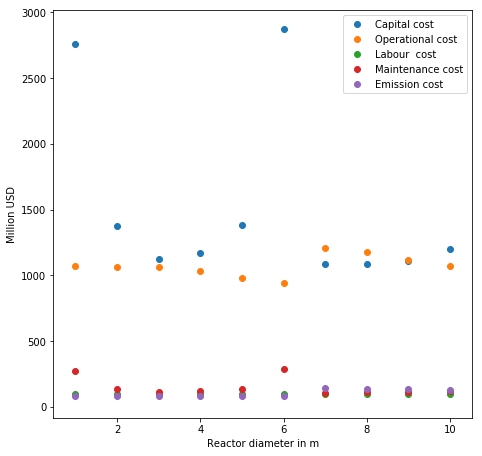

In [134]:
plt.figure(figsize=(7.5,7.5))
configuration=[1,2,3,4,5,6,7,8,9,10]
plt.scatter(configuration,total_capital_cost,label='Capital cost')
plt.scatter(configuration,operational_cost_annual,label="Operational cost")
plt.scatter(configuration,labour_cost_yr,label="Labour  cost")
plt.scatter(configuration,maintenance_cost_yr,label="Maintenance cost")
plt.scatter(configuration,total_emission_cost,label='Emission cost')
plt.xlabel('Reactor diameter in m')
plt.ylabel('Million USD')
plt.legend()
plt.savefig('Capital_cost.pdf',dpi=1200)

<Figure size 720x720 with 0 Axes>

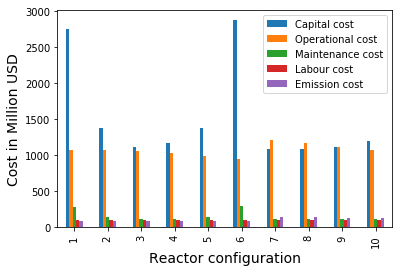

In [135]:
plt.figure(figsize=(10,10))
df_system.reset_index().plot(
    x="Sno", y=['Total system cost USD mil','Operational cost USD mil','Maintenance cost USD mil','Labour cost USD mil','Emission cost USD mil'], kind="bar"
).legend(['Capital cost','Operational cost','Maintenance cost','Labour cost','Emission cost'])

plt.xlabel("Reactor configuration",fontsize=14)
plt.ylabel("Cost in Million USD",fontsize=14)
plt.savefig('System_costs.pdf')

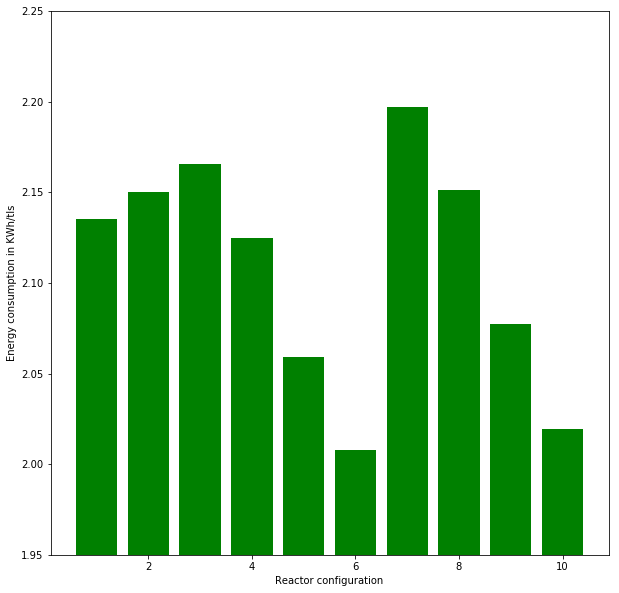

In [136]:
plt.figure(figsize=(10,10))
plt.bar([1,2,3,4,5,6,7,8,9,10],E_total_MWh,color='Green')
plt.xlabel("Reactor configuration")
plt.ylabel("Energy consumption in MWh/tls")
plt.ylim(1.95,2.25)
plt.savefig('system_energy.pdf')

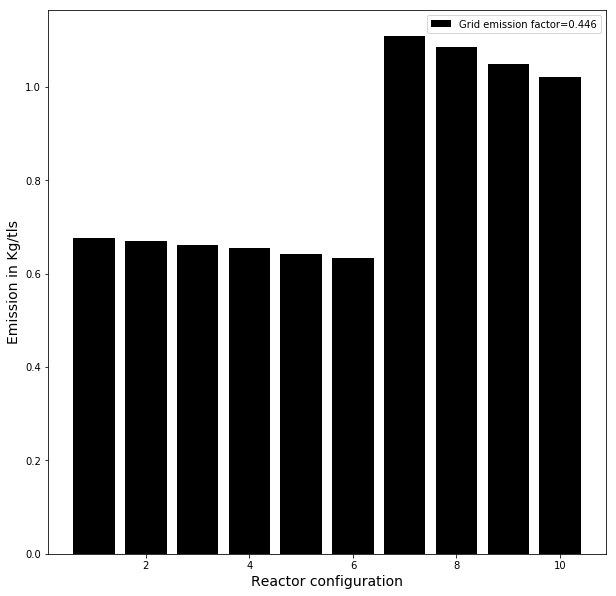

In [137]:
plt.figure(figsize=(10,10))
if(grid_emission_factor==0.445):
    a='Grid emission factor=0.446'
else:
    a='Grid emission factor =0.0164'
plt.bar([1,2,3,4,5,6,7,8,9,10],total_emission,color='black',label=a)
plt.xlabel("Reactor configuration",fontsize=14)
plt.ylabel("Emission in Kg/tls",fontsize=14)
#plt.ylim(0.6,1.25)
plt.legend()
plt.savefig('system_emission_norway.pdf')

In [138]:
def cashflow_analysis(capital_cost,operation_cost,maintenance_cost,labour_cost,emission_cost,depreciation_cost,total_revenue):
    #capital cost
    #reactor cost calculation
    plant_life=25
    interest_rate=0.10
    tax_rate=0.35
    
    years=np.arange(0,plant_life,1)
    Years=np.round(years,0)
    production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
    #production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()
    
    
       
        
       
  
    capital_cost_yr=np.repeat(0,plant_life).tolist()
    capital_cost_yr[0]=(capital_cost/3)
    capital_cost_yr[1]=(capital_cost)*(2/3)
    operational_cost=np.repeat(operation_cost,plant_life).tolist()
    maintenance_cost=np.repeat(maintenance_cost,plant_life).tolist()
    labour_cost=np.repeat(labour_cost,plant_life).tolist()
    emission_cost=np.repeat(emission_cost,plant_life).tolist()
    depreciation_cost=np.repeat(depreciation_cost,plant_life).tolist()
    total_revenue=np.repeat(total_revenue,plant_life).tolist()

    for i in range(2):
        production_steel[i]=0
        operational_cost[i]=0
        labour_cost[i]=0
        maintenance_cost[i]=0
        emission_cost[i]=0 
        depreciation_cost[i]=0
        total_revenue[i]=0
    # tax calculation
    tax_cost=[]
    for i in range(len(operational_cost)):
        tax_cost.append((total_revenue[i]-(operational_cost[i]+labour_cost[i]+maintenance_cost[i]+emission_cost[i]+depreciation_cost[i]))*tax_rate)
    cash_flow=[]
    for i in range(len(total_revenue)):
        cash_flow.append(total_revenue[i]-(capital_cost_yr[i]+operational_cost[i]+labour_cost[i]+maintenance_cost[i]+emission_cost[i]+tax_cost[i]))
    npv=np.npv(interest_rate,cash_flow)
    irr=np.irr(cash_flow)
    #return(NPV_methane_pyrolysis,IRR_system)
    return(npv)
    
    


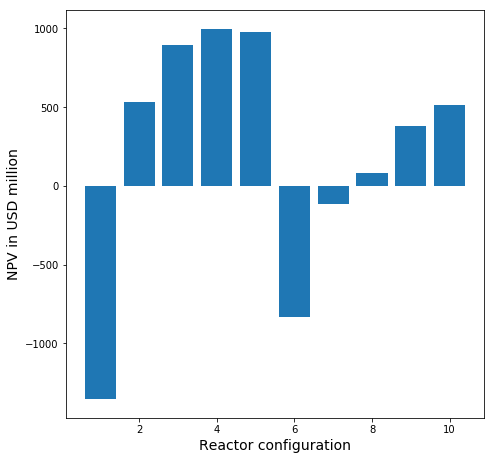

In [153]:
NPV=[]
IRR=[]
for i in range(len(T_reactor)):
    capital_cost=total_capital_cost[i]
    operation_cost=operational_cost_annual[i]
    maintenance_cost=maintenance_cost_yr[i]
    labour_cost=labour_cost_yr[i]
    emission_cost=total_emission_cost[i]
    depreciation_cost=depreciation_yr[i]
    total_revenue=total_revenue_usd_million[i]
    NPV_yr=(cashflow_analysis(capital_cost,operation_cost,maintenance_cost,labour_cost,emission_cost,depreciation_cost,total_revenue))
    NPV.append(NPV_yr)
plt.rcParams["figure.figsize"] = [7.5,7.5]    
plt.bar([1,2,3,4,5,6,7,8,9,10],NPV)
plt.xlabel("Reactor configuration",fontsize=14)
plt.ylabel("NPV in USD million",fontsize=14)
plt.savefig('NPV_configurations.pdf',dpi=1200)

In [140]:
cashflow_analysis(capital_cost,operation_cost,maintenance_cost,labour_cost,emission_cost,depreciation_cost,total_revenue)

513.5326566754068

In [141]:
def irr_analysis(capital_cost,operation_cost,maintenance_cost,labour_cost,emission_cost,depreciation_cost,total_revenue):
    #capital cost
    #reactor cost calculation
    plant_life=25
    interest_rate=0.10
    tax_rate=0.35
    
    years=np.arange(0,plant_life,1)
    Years=np.round(years,0)
    production_steel=np.repeat(steel_prod_yr/10**6,plant_life).tolist()
    #production_hydrogen=np.repeat(h2_prod_yr/1000000,plant_life).tolist()     
        
       
  
    capital_cost_yr=np.repeat(0,plant_life).tolist()
    capital_cost_yr[0]=(capital_cost/3)
    capital_cost_yr[1]=(capital_cost)*(2/3)
    operational_cost=np.repeat(operation_cost,plant_life).tolist()
    maintenance_cost=np.repeat(maintenance_cost,plant_life).tolist()
    labour_cost=np.repeat(labour_cost,plant_life).tolist()
    emission_cost=np.repeat(emission_cost,plant_life).tolist()
    depreciation_cost=np.repeat(depreciation_cost,plant_life).tolist()
    total_revenue=np.repeat(total_revenue,plant_life).tolist()

    for i in range(2):
        production_steel[i]=0
        operational_cost[i]=0
        labour_cost[i]=0
        maintenance_cost[i]=0
        emission_cost[i]=0 
        depreciation_cost[i]=0
        total_revenue[i]=0
    # tax calculation
    tax_cost=[]
    for i in range(len(operational_cost)):
        tax_cost.append((total_revenue[i]-(operational_cost[i]+labour_cost[i]+maintenance_cost[i]+emission_cost[i]+depreciation_cost[i]))*tax_rate)
    cash_flow=[]
    for i in range(len(total_revenue)):
        cash_flow.append(total_revenue[i]-(capital_cost_yr[i]+operational_cost[i]+labour_cost[i]+maintenance_cost[i]+emission_cost[i]+tax_cost[i]))
    npv=np.npv(interest_rate,cash_flow)
    irr=np.irr(cash_flow)
    #return(NPV_methane_pyrolysis,IRR_system)
    return(irr)
    
    

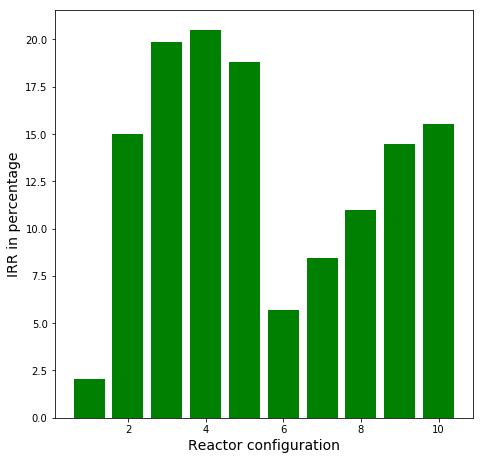

In [155]:
IRR=[]
for i in range(len(T_reactor)):
    capital_cost=total_capital_cost[i]
    operation_cost=operational_cost_annual[i]
    maintenance_cost=maintenance_cost_yr[i]
    labour_cost=labour_cost_yr[i]
    emission_cost=total_emission_cost[i]
    depreciation_cost=depreciation_yr[i]
    total_revenue=total_revenue_usd_million[i]
    IRR_yr=(irr_analysis(capital_cost,operation_cost,maintenance_cost,labour_cost,emission_cost,depreciation_cost,total_revenue))
    IRR.append(IRR_yr*100)
plt.rcParams["figure.figsize"] = [7.5,7.5]    
plt.bar([1,2,3,4,5,6,7,8,9,10],IRR,color='Green')
plt.xlabel("Reactor configuration",fontsize=14)
plt.ylabel("IRR in percentage", fontsize=14)
plt.savefig('IRR_configurations.pdf',dpi=1200)

In [143]:
IRR

[2.068673748049954,
 15.005976946085786,
 19.85085196571612,
 20.52164207872813,
 18.80183400232369,
 5.6893162529843,
 8.467993775616645,
 10.999116209815195,
 14.466783512917548,
 15.513141642598583]

In [144]:
NPV

[-1354.6837113369818,
 530.742272592554,
 892.2748457199671,
 997.5132173824917,
 975.2069012126369,
 -831.3280677115023,
 -117.02752267241141,
 79.71809101058727,
 379.96409406966535,
 513.5326566754068]

In [145]:
df_reactor=pd.DataFrame()
df_reactor['Sno']=[1,2,3,4,5,6,7,8,9,10]
df_reactor.set_index('Sno')
df_reactor['Length m']=len_reac
df_reactor['Diameter m']=dia_reac
df_reactor['Surface_area m^2']=sur_area_reac
df_reactor['Volume m^3']=vol_reac
df_reactor['Temperature C']=T_reactor
df_reactor['Conversion rate']=conversion_meth
df_energy_1=pd.DataFrame()
df_energy_1['Natural gas']=total_ng_req_tls
#df_reactor['Hydrogen_rate kg/s']=(df_reactor['Conversion rate']*df_reactor['Methane feed rate kg/s'])/4

df_reactor['Heat source']=heat_source
df_reactor['Reactor cost USD mil']=reactor_cost



In [146]:
#df_reactor.round(2).to_latex(index=False)

In [147]:
df_energy_1.round(2).to_latex(index=False)

'\\begin{tabular}{r}\n\\toprule\n Natural gas \\\\\n\\midrule\n      567.21 \\\\\n      570.67 \\\\\n      574.19 \\\\\n      536.81 \\\\\n      476.24 \\\\\n      429.00 \\\\\n      485.26 \\\\\n      450.54 \\\\\n      394.27 \\\\\n      350.40 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [148]:
df_energy=pd.DataFrame()
df_energy['Sno']=[1,2,3,4,5,6,7,8,9,10]
df_energy['Reactor energy']=H_per_ton_steel
df_energy['Shaft furnace']=df_system['Electrical energy required in shaft furnace in KWh/tls']/1000
df_energy['EAF']=(df_system['Electrical energy required in EAF in KWh/tls']/1000)

#df_energy['Natural gas feedstock']=(df_energy['Natural gas']*42000)/3600000
df_energy['System']=((df_system['Electrical energy required in shaft furnace in KWh/tls']/1000)+df_system['Reactor energy in MWh/tls']+(df_system['Electrical energy required in EAF in KWh/tls']/1000))
#df_energy['Reactor percentage']=(df_energy['Reactor energy MWh/tls']/df_energy['System energy consumption MWh/tls'])*100
#df_energy['Shaft percentage']=((df_energy['Shaft furnace KWh/tls']/1000)/df_energy['System energy consumption MWh/tls'])*100
#df_energy['EAF percentage']=((df_energy['EAF KWh/tls']/1000)/df_energy['System energy consumption MWh/tls'])*100
#df_energy.round(2).to_latex(index=False)

In [149]:
df_emission=pd.DataFrame()
df_emission['Sno']=[1,2,3,4,5,6,7,8,9,10]
df_emission['Reactor emissions (elec) t/tls']=reac_ems_el
df_emission['Reactor emissions(methane) t/tls']=reac_ems_meth
df_emission['DRI emission t/tls']=dri_emission
df_emission['EAF emission t/tls']=eaf_emission
df_emission['Total emission t/tls']=total_emission
#df_emission.round(2).to_latex(index=False)

In [150]:
df_emission

,Sno,Reactor emissions (elec) t/tls,Reactor emissions(methane) t/tls,DRI emission t/tls,EAF emission t/tls,Total emission t/tls
0,1,0.000000,0.225357,0.195016,0.256179,0.676553
1,2,0.000000,0.234888,0.178065,0.256179,0.669132
2,3,0.000000,0.244551,0.160991,0.256179,0.661721
3,4,0.000000,0.237230,0.160991,0.256179,0.654400
4,5,0.000000,0.225410,0.160991,0.256179,0.642580
5,6,0.000000,0.216155,0.160991,0.256179,0.633325
6,7,0.725841,0.000000,0.126380,0.256179,1.108400
7,8,0.703198,0.000000,0.126380,0.256179,1.085758
8,9,0.666630,0.000000,0.126380,0.256179,1.049190
9,10,0.638009,0.000000,0.126380,0.256179,1.020568


In [151]:
total_ng_req_tls

[567.2062266405063,
 570.6720061369626,
 574.1860082423966,
 536.808014267656,
 476.23955742655284,
 429.0026478169903,
 485.2582105577472,
 450.5424109030657,
 394.27229607816963,
 350.4006811299456]